#Tamil Handrwriting recognition of first 11 vowels (using CNN)
###Importing necessary libraries

In [0]:
import matplotlib.image as mpimg # to read image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential # to create a neural network
from keras.optimizers import RMSprop # RMSProp optimizer
from keras.preprocessing.image import ImageDataGenerator # Image generator class
from keras.callbacks import ReduceLROnPlateau # changes the learning rate if the accuracy is stagnant
from sklearn.model_selection import train_test_split # to split train.csv data for cross validation
from sklearn.metrics import confusion_matrix # to construct confusion matrix
import itertools # has iterator functions for efficient looping
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # Operations on CNN
from keras.optimizers import RMSprop # RMSProp optimizer
from keras.preprocessing.image import ImageDataGenerator # Image generator class
from keras.callbacks import ReduceLROnPlateau # Reduce learning rate callback function
from skimage.transform import resize # resize image
import os # operation on directories

###Mounting google drive

In [0]:
from google.colab import drive # to mount google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###Unzipping *train_val* folder
This folder contains images to test as well as validate the model. We will be converting the images into a single .csv file. That's why we are combining both train and validatin images together 

In [0]:
!unzip /content/drive/My\ Drive/tamil_cnn/train_val.zip # unzip the folder 'train_val' (train & val pics together)

Archive:  /content/drive/My Drive/tamil_cnn/train_val.zip
   creating: train_val/
   creating: train_val/1/
  inflating: train_val/1/u16_000t01.tiff  
  inflating: train_val/1/u16_000t02.tiff  
  inflating: train_val/1/u16_000t03.tiff  
  inflating: train_val/1/u16_000t04.tiff  
  inflating: train_val/1/u16_000t05.tiff  
  inflating: train_val/1/u16_000t06.tiff  
  inflating: train_val/1/u16_000t07.tiff  
  inflating: train_val/1/u16_000t08.tiff  
  inflating: train_val/1/u16_000t09.tiff  
  inflating: train_val/1/u16_000t10.tiff  
  inflating: train_val/1/u17_000t01.tiff  
  inflating: train_val/1/u17_000t02.tiff  
  inflating: train_val/1/u17_000t03.tiff  
  inflating: train_val/1/u17_000t04.tiff  
  inflating: train_val/1/u17_000t05.tiff  
  inflating: train_val/1/u17_000t06.tiff  
  inflating: train_val/1/u17_000t07.tiff  
  inflating: train_val/1/u17_000t08.tiff  
  inflating: train_val/1/u17_000t09.tiff  
  inflating: train_val/1/u17_000t10.tiff  
  inflating: train_val/1/u18_000

In [0]:
#dimension to resize
resize_dim = 150

###A python function to convert the 4 channel test_val images into single channel image
This function also inverts the color (B&W) and returns it as a flattened numpy array

In [0]:
def gscale_rsize_flatten(img_fname, resize_dim):
  img = mpimg.imread(img_fname)
  img_gray = np.array(1-(img[:,:,0]/255))
  max_dim = max(img_gray.shape)
  if np.argmax(img_gray.shape)==0:
    min_dim = img_gray.shape[1]
    n_pad = max_dim - min_dim
    n_pad_half = n_pad//2
    padzero = np.zeros((max_dim,n_pad_half))
    img_gray = np.hstack((padzero, img_gray))
    padzero = np.zeros((max_dim,n_pad-n_pad_half))
    img_gray = np.hstack((img_gray, padzero))
  else:
    min_dim = img_gray.shape[0]    #vertical pad
    n_pad = max_dim - min_dim
    n_pad_half = n_pad//2
    padzero = np.zeros((n_pad_half, max_dim))
    img_gray = np.vstack((padzero, img_gray))
    padzero = np.zeros((n_pad-n_pad_half, max_dim))
    img_gray = np.vstack((img_gray, padzero))
  img_gray = resize(img_gray, (resize_dim, resize_dim))
  img_gray = np.round(img_gray+0.49)
  return img_gray.flatten()

###Images to .csv file conversion
Each image is read and converted into array using the function *gscale_rsize_flatten*. Those numpy arrays are added as a row in the csv file with their labels.

In [0]:
pixel_end = resize_dim*resize_dim
col_names = ['pixel'+str(i) for i in range(pixel_end)]
col_names.append('label')
tamil_handwritten_df = pd.DataFrame(columns=col_names)
dir_root = '/content/train_val'
if os.path.exists(dir_root):
    os.chdir(dir_root)          # Change the current working Directory
    dir_list = os.listdir()     # Get list of directories in cwd
    for dir_name in dir_list:
      os.chdir(dir_root+'/'+dir_name)
      print('Reading: '+dir_root+'/'+dir_name)
      flist = os.listdir()
      for fname in flist:
        print('converting: '+fname)
        flat_img_array = gscale_rsize_flatten(fname, resize_dim)
        flat_img_array = np.append(flat_img_array, int(dir_name))
        tamil_handwritten_df = tamil_handwritten_df.append(
            pd.Series(flat_img_array, index=col_names), ignore_index=True)
else:
    print("Can't change the Current Working Directory")
os.chdir('/content')
print(tamil_handwritten_df.shape)
tamil_handwritten_df.to_csv('tamil_handwritten.csv', index=False)

Reading: /content/train_val/11
converting: u35_010t08.tiff
converting: u34_010t02.tiff
converting: u38_010t02.tiff
converting: u38_009t06.tiff
converting: u29_009t03.tiff
converting: u51_010t02.tiff
converting: u43_010t01.tiff
converting: u25_010t08.tiff
converting: u40_010t04.tiff
converting: u40_010t02.tiff
converting: u17_010t02.tiff
converting: u18_010t01.tiff
converting: u47_010t02.tiff
converting: u25_009t02.tiff
converting: u36_010t06.tiff
converting: u54_010t02.tiff
converting: u28_010t04.tiff
converting: u35_010t03.tiff
converting: u26_010t06.tiff
converting: u52_009t02.tiff
converting: u38_010t04.tiff
converting: u20_010t05.tiff
converting: u37_010t09.tiff
converting: u17_010t10.tiff
converting: u41_010t01.tiff
converting: u40_010t08.tiff
converting: u22_010t09.tiff
converting: u19_010t04.tiff
converting: u33_010t08.tiff
converting: u35_010t10.tiff
converting: u23_010t10.tiff
converting: u19_010t02.tiff
converting: u27_010t01.tiff
converting: u34_010t09.tiff
converting: u16_0

#Retreiving .csv file from google drive
Since the files stored in google colab are volatile in nature, I saved the .csv file generate in the previous step and I am unzipping it again for model training

In [0]:
!unzip /content/drive/My\ Drive/tamil_cnn/tamil_handwritten_csv.zip

Archive:  /content/drive/My Drive/tamil_cnn/tamil_handwritten_csv.zip
replace tamil_handwritten.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tamil_handwritten.csv   


In [0]:
train = pd.read_csv('tamil_handwritten.csv')

In [0]:
train.shape

(2985, 22501)

In [0]:
Y = train['label']
X = train.drop(labels = ["label"],axis = 1) # Drop 'label' column
X.shape

(2985, 22500)

In [0]:
X = X.values.reshape(-1,resize_dim,resize_dim,1)
print(X.shape)

(2985, 150, 150, 1)


In [0]:
Y = to_categorical(Y, num_classes = 12) # one hot encoding (example: 2 -> [0,0,1,0,0,0,0,0,0,0])
print(Y.shape)

(2985, 12)


In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, shuffle=True)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(2388, 150, 150, 1)
(597, 150, 150, 1)
(2388, 12)
(597, 12)


###Display of a sample image

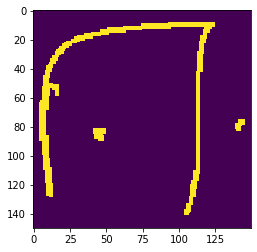

In [0]:
g = plt.imshow(X_train[2000][:,:,0]) # first image

###Constructing the CNN

In [0]:
tamil_model = Sequential()
tamil_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                       activation ='relu',
                       input_shape = (resize_dim,resize_dim,1)))
# input 2D convolutional layer
tamil_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                       activation ='relu'))
tamil_model.add(MaxPool2D(pool_size=(2,2))) # 2D max pooling
tamil_model.add(Dropout(0.25)) # applies dropout to prevent overfitting

tamil_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                       activation ='relu'))
tamil_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                       activation ='relu'))
tamil_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
tamil_model.add(Dropout(0.25))

tamil_model.add(Flatten()) # Flattens without affecting the size
tamil_model.add(Dense(256, activation = "relu")) # dense layer of size 256 units
tamil_model.add(Dropout(0.5))

tamil_model.add(Dense(12, activation = "softmax"))
# dense layer of size 12 to output the digit value

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# RMSprop optimizer divides the gradient by root mean square
tamil_model.compile(optimizer = optimizer , loss = "categorical_crossentropy",
                    metrics=["accuracy"]) # Compile the model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3, factor=0.3, 
                                            verbose=1, min_lr=0.00001)

###Image augmentation

In [0]:
data_aug = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # zoom image
        width_shift_range=0.1,  # shift images horizontally 
        height_shift_range=0.1,  # shift images vertically 
        horizontal_flip=False,  # flip images horizontally
        vertical_flip=False)  # flip images vertically
data_aug.fit(X_train) # apply datagen augmentation to train data

###Training the CNN model

In [0]:
epochs = 30
batch_size = 12
history = tamil_model.fit_generator(data_aug.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/30
 - 18s - loss: 1.0261 - acc: 0.6688 - val_loss: 0.3406 - val_acc: 0.8677
Epoch 2/30
 - 18s - loss: 0.6728 - acc: 0.7751 - val_loss: 0.2501 - val_acc: 0.9095
Epoch 3/30
 - 18s - loss: 0.5046 - acc: 0.8308 - val_loss: 0.1609 - val_acc: 0.9447
Epoch 4/30
 - 18s - loss: 0.4242 - acc: 0.8564 - val_loss: 0.1408 - val_acc: 0.9564
Epoch 5/30
 - 18s - loss: 0.3376 - acc: 0.8840 - val_loss: 0.1056 - val_acc: 0.9665
Epoch 6/30
 - 18s - loss: 0.3358 - acc: 0.8836 - val_loss: 0.1039 - val_acc: 0.9598
Epoch 7/30
 - 18s - loss: 0.3106 - acc: 0.9024 - val_loss: 0.1292 - val_acc: 0.9464
Epoch 8/30
 - 18s - loss: 0.3074 - acc: 0.9037 - val_loss: 0.0849 - val_acc: 0.9765
Epoch 9/30
 - 18s - loss: 0.2397 - acc: 0.9171 - val_loss: 0.0945 - val_acc: 0.9648
Epoch 10/30
 - 18s - loss: 0.2698 - acc: 0.9083 - val_loss: 0.0869 - val_acc: 0.9715
Epoch 11/30
 - 18s - loss: 0.2530 - acc: 0.9271 - val_loss: 0.1085 - val_acc: 0.9648

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.00030000001424

###Testing on a list of images randomly chosen from the data set

In [0]:
test_img_list = ['u18_000t05.tiff', 'u19_007t08.tiff', 'u22_002t09.tiff',
                 'u22_005t08.tiff', 'u22_006t09.tiff', 'u22_010t09.tiff',
                 'u23_004t01.tiff', 'u24_001t06.tiff', 'u27_009t08.tiff',
                 'u29_003t07.tiff', 'u30_008t05.tiff']

PREDICTED OUTPUT:ah


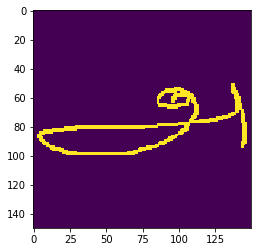

In [0]:
test_gscale = gscale_rsize_flatten( test_img_list[0], resize_dim)
test_gscale.resize((1,resize_dim, resize_dim,1))
class_pred = tamil_model.predict_classes(test_gscale)
list_out = ['NA','ah','aah','e','ee','vu','voo','ye','yeah','ai','oh','ooh']
print('PREDICTED OUTPUT:' + list_out[class_pred[0]])
plt.imshow(test_gscale[0,:,:,0])

PREDICTED OUTPUT:voo


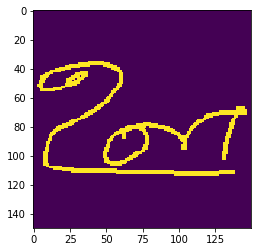

In [0]:
test_gscale = gscale_rsize_flatten( test_img_list[3], resize_dim)
test_gscale.resize((1,resize_dim, resize_dim,1))
class_pred = tamil_model.predict_classes(test_gscale)
list_out = ['NA','ah','aah','e','ee','vu','voo','ye','yeah','ai','oh','ooh']
print('PREDICTED OUTPUT:' + list_out[class_pred[0]])
plt.imshow(test_gscale[0,:,:,0])

###Predicting a handwritten tamil vowel image cropped from google image search
3 channel color image is converted into a grayscale image using the formula GrayScaleValue = (0.3 * R) + (0.59 * G) + (0.11 * B). Then the grayscale image in padded with zeros to get a square dimension. Finally the image is resized to a custom value specified in the program and the letter in the image is predicted successfully.


(150, 150)
PREDICTED OUTPUT:e


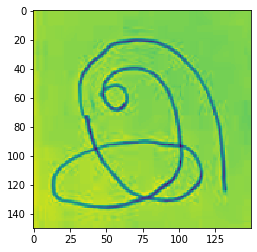

In [0]:
#random file cropped from google image search
test_img = mpimg.imread('e.JPG')
test_img_gray = np.array(test_img[:,:,0]*0.3 + test_img[:,:,0]*0.59 + test_img[:,:,0]*0.11)
#(0.3 * R) + (0.59 * G) + (0.11 * B)
max_dim = max(test_img_gray.shape)
if np.argmax(test_img_gray.shape)==0:
  min_dim = test_img_gray.shape[1]
  n_pad = max_dim - min_dim
  n_pad_half = n_pad//2
  padzero = np.zeros((max_dim,n_pad_half))
  test_img_gray = np.hstack((padzero, test_img_gray))
  padzero = np.zeros((max_dim,n_pad-n_pad_half))
  test_img_gray = np.hstack((test_img_gray, padzero))
else:
  min_dim = test_img_gray.shape[0]    #vertical pad
  n_pad = max_dim - min_dim
  n_pad_half = n_pad//2
  padzero = np.zeros((n_pad_half, max_dim))
  test_img_gray = np.vstack((padzero, test_img_gray))
  padzero = np.zeros((n_pad-n_pad_half, max_dim))
  test_img_gray = np.vstack((img_gray, padzero))
test_img_gray = resize(test_img_gray, (resize_dim, resize_dim))
test_img_gray = np.round(test_img_gray+0.49)
print(test_img_gray.shape)
plt.imshow(test_img_gray)
test_img_gray.resize((1,resize_dim, resize_dim,1))
class_pred = tamil_model.predict_classes(test_img_gray)
list_out = ['NA','ah','aah','e','ee','vu','voo','ye','yeah','ai','oh','ooh']
print('PREDICTED OUTPUT:' + list_out[class_pred[0]])